In [ ]:
# colab용
!nvidia-smi

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck' ]
NUM_CLASSES = 10


if y_test.shape[1] == 1:
  x_train = x_train/255.
  x_test = x_test/255.
  y_train = to_categorical(y_train, NUM_CLASSES)
  y_test = to_categorical(y_test, NUM_CLASSES)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [2]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 10s 5ms/step - loss: 1.4909 - accuracy: 0.4545 - val_loss: 1.1352 - val_accuracy: 0.5968
Epoch 2/30
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0058 - accuracy: 0.6414 - val_loss: 0.9749 - val_accuracy: 0.6566
Epoch 3/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8105 - accuracy: 0.7163 - val_loss: 0.8175 - val_accuracy: 0.7164
Epoch 4/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6919 - accuracy: 0.7588 - val_loss: 0.7652 - val_accuracy: 0.7347
Epoch 5/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5868 - accuracy: 0.7956 - val_loss: 0.7948 - val_accuracy: 0.7299
Epoch 6/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5097 - accuracy: 0.8218 - val_loss: 0.7672 - val_accuracy: 0.7464
Epoch 7/30
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4386 - accuracy: 0.8454 - val_loss: 0.7873 - val_accuracy

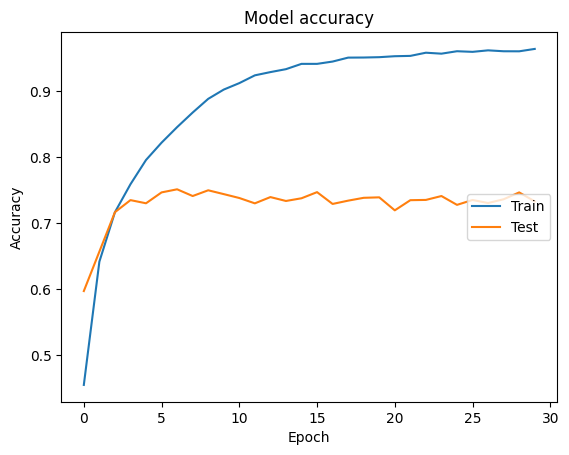

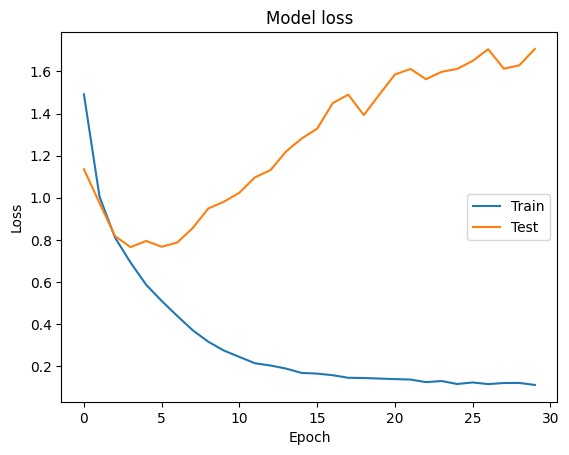

In [3]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(['Train', 'Test'], loc=4)
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(['Train', 'Test'], loc=5)
plt.show()

In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    keras.layers.Flatten(),
    # Dropout
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation = 'relu'),
    # Dropout
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7464 - accuracy: 0.3518 - val_loss: 1.3238 - val_accuracy: 0.5230
Epoch 2/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3281 - accuracy: 0.5248 - val_loss: 1.1554 - val_accuracy: 0.5820
Epoch 3/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1392 - accuracy: 0.6012 - val_loss: 1.0845 - val_accuracy: 0.6092
Epoch 4/30
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0359 - accuracy: 0.6405 - val_loss: 0.9555 - val_accuracy: 0.6669
Epoch 5/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9654 - accuracy: 0.6674 - val_loss: 0.9081 - val_accuracy: 0.6899
Epoch 6/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8978 - accuracy: 0.6907 - val_loss: 0.8140 - val_accuracy: 0.7182
Epoch 7/30
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8533 - accuracy: 0.7082 - val_loss: 0.7907 - val_accuracy:

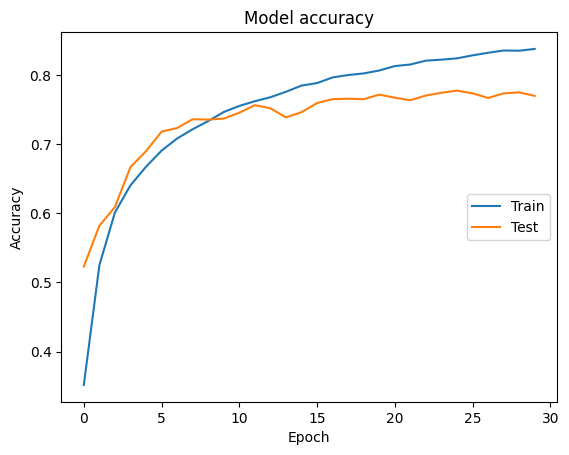

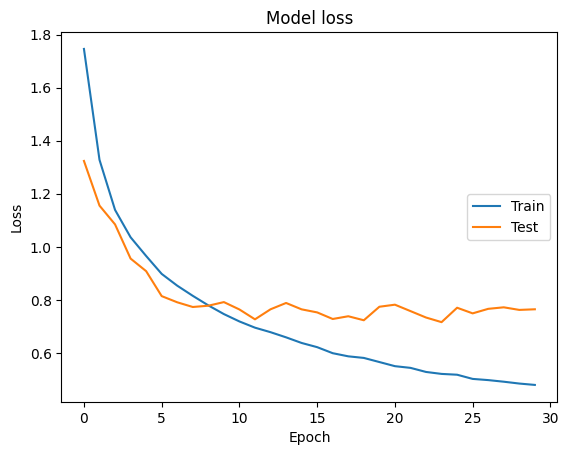

In [6]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(['Train', 'Test'], loc=5)
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend(['Train', 'Test'], loc=5)
plt.show()